In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('loan_data.csv')

In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.shape

(614, 13)

In [78]:
# Vérifier la présence des valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
#Afficher les types des colonnes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [80]:
# Fonction pour modifier les valeurs manquantes des variables catégorielles par la mode
def replace_null_obj(data_frame, col_name):
    data_frame[col_name].fillna(data_frame[col_name].mode()[0], inplace=True)

In [81]:
# Remplacer les variables catégorielles manquantes par le mode
for col_name in list(df.columns):
    if df.dtypes[col_name] == np.object and df[col_name].isnull().values.any():
         replace_null_obj(df, col_name)

In [82]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
def replace_null_num(data_frame, col_name):
    data_frame[col_name].fillna(data_frame[col_name].mean(), inplace=True)

In [84]:
# Remplacer les variables quantitatives manquantes par la moyenne
for col_name in list(df.columns):
    if df.dtypes[col_name] == np.int64 or df.dtypes[col_name] == np.float64 and df[col_name].isnull().values.any():
        #replace_null(df, col_name)
         replace_null_num(df, col_name)

In [85]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [89]:
#Supprimer la colonne des identifiants
df = df.drop('Loan_ID', axis=1)

In [91]:
df.shape

(614, 12)

In [98]:
# Convertir les variables qualitatives en variables quantitatives grâce à la foncition map
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [99]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [100]:
# Normalisez les variables en mettant leurs valeurs entre 0 et 1 [Xnorm = (X-Xmin)/(Xmax-Xmin)]
for i in df.columns[1:]:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [101]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [102]:
# Extraction des variables indépendantes
X = df.iloc[:, :-1].values

In [103]:
y = df.iloc[:, -1].values

In [105]:
# Séparer le dataset en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =10)

In [106]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [107]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense 

In [111]:
# Nombres des neurons d'entrées
input_neurons= X_train.shape[1]
print(input_neurons)

11


In [112]:
# Comme il s'agit d'une classification binaire nous avons un seul neuron de sortie
output_neurons = 1

In [143]:
# Architecture du modèle 
classifier = Sequential()
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_neurons))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Compiler le réseau de neuron
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [145]:
# Entrainer le modèle
EPOCHS = 60
classifier_history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 10, epochs = EPOCHS)


Epoch 1/60
50/50 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.6680 - val_loss: 0.6797 - val_accuracy: 0.7073
Epoch 2/60
50/50 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.6823 - val_loss: 0.6464 - val_accuracy: 0.7073
Epoch 3/60
50/50 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6823 - val_loss: 0.6060 - val_accuracy: 0.7073
Epoch 4/60
50/50 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.6823 - val_loss: 0.5945 - val_accuracy: 0.7073
Epoch 5/60
50/50 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.6823 - val_loss: 0.5861 - val_accuracy: 0.7073
Epoch 6/60
50/50 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.6823 - val_loss: 0.5816 - val_accuracy: 0.7073
Epoch 7/60
50/50 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.6823 - val_loss: 0.5756 - val_accuracy: 0.7073
Epoch 8/60
50/50 [==

50/50 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8126 - val_loss: 0.4842 - val_accuracy: 0.7967
Epoch 60/60
50/50 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8147 - val_loss: 0.4808 - val_accuracy: 0.7967


In [146]:
# Prédiction du testset
prediction = classifier.predict(X_test)
print(classifier_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


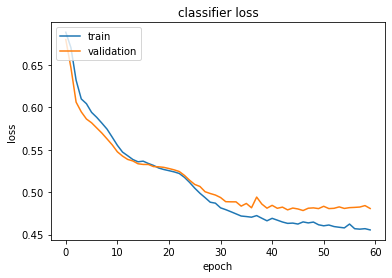

In [147]:
# Resumé de l'historique du modèle
N = np.arange(0, EPOCHS)
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('classifier loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()